In [5]:
from sigmatrader.dataloader import BinanceLoader
from sigmatrader.featurebuilder import MultiTransformer, TABuilder
from sigmatrader.marketenv.marketenv import MarketEnv
from sigmatrader.splitter import RelativeSplitter
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
symbol="BTCUSDT"

In [8]:
# Setup pipeline
loader = BinanceLoader(
    symbol=symbol,
    start_date=datetime(2019, 9, 1),
    end_date=datetime(2024, 3, 31),
    interval=(interval := "1d"),
)
splitter = RelativeSplitter(train=0.8, validation=0.1, test= 0.1)

transformers = []
ta_features = TABuilder()
transformers.append(ta_features)

transformer = MultiTransformer(transformers=transformers)

# Execute pipeline
data = loader.load()
datasets = splitter.split(data)

train_data = transformer.fit_transform(datasets["train"])

,open,high,low,close,volume,bb_mavg,bb_hband,bb_lband,sma_50,sma_100,macd_line,macd_signal,macd_hist,rsi_14
open,1.000000,0.998842,0.997792,0.997239,-0.212469,0.984865,0.981147,0.972008,0.883087,0.883087,0.188998,0.211329,-0.043804,-0.015872
high,0.998842,1.000000,0.997576,0.998770,-0.207096,0.984423,0.982070,0.969816,0.881848,0.881848,0.190359,0.211846,-0.040653,-0.006434
low,0.997792,0.997576,1.000000,0.998499,-0.221071,0.981830,0.976560,0.971025,0.880299,0.880299,0.194493,0.212904,-0.029304,0.000091
close,0.997239,0.998770,0.998499,1.000000,-0.214091,0.982240,0.979012,0.968798,0.879208,0.879208,0.195705,0.214343,-0.029875,0.006450
volume,-0.212469,-0.207096,-0.221071,-0.214091,1.000000,-0.209602,-0.204302,-0.212671,-0.193201,-0.193201,-0.033524,-0.034654,-0.002002,-0.007021
bb_mavg,0.984865,0.984423,0.981830,0.982240,-0.209602,1.000000,0.993923,0.989908,0.920579,0.920579,0.053258,0.108423,-0.181066,-0.141000
bb_hband,0.981147,0.982070,0.976560,0.979012,-0.204302,0.993923,1.000000,0.968294,0.913466,0.913466,0.060602,0.111400,-0.164697,-0.126998
bb_lband,0.972008,0.969816,0.971025,0.968798,-0.212671,0.989908,0.968294,1.000000,0.913242,0.913242,0.042850,0.102649,-0.198897,-0.156500
sma_50,0.883087,0.881848,0.880299,0.879208,-0.193201,0.920579,0.913466,0.913242,1.000000,1.000000,-0.241616,-0.227945,-0.089752,-0.313409
sma_100,0.883087,0.881848,0.880299,0.879208,-0.193201,0.920579,0.913466,0.913242,1.000000,1.000000,-0.241616,-0.227945,-0.089752,-0.313409


<Axes: >

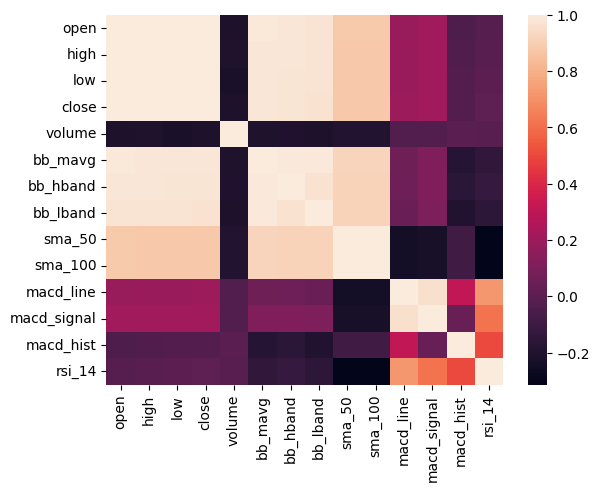

In [9]:
corr = train_data.select_dtypes("number").corr()
display(corr)
sns.heatmap(corr)